# Noisy ReLU

\\(f(x)= max(x+noise,0) \\)

\\(Now\, lets\, see\, a\, plot\, of\, Noisy\,ReLU\, with\, \mu = 0\, and\, \sigma = 0.05\\)

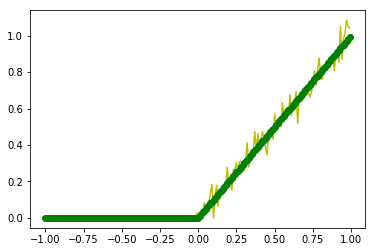

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-1, 1,0.01)
mu, sigma = 0, 0.05
noise = np.random.normal(mu, sigma, 200)
y = np.maximum(x + noise,0)
plt.plot(x, y, 'y')
plt.plot(x, np.maximum(x,0), 'go')

In [2]:
from keras.models import Model,Sequential
from keras.layers import *
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

Using TensorFlow backend.


In [3]:
def NoisyReLU(x):
    noise = K.random_normal(K.shape(x), mean=0.0, stddev=0.1)
    return K.greater(x+noise,0)

get_custom_objects().update({'NoisyReLU': Activation(NoisyReLU)})

\\(This\, can\, be\, used\, both\, in\, keras\, sequential\, and\, functional\, api\, programming\\)

### Functional API

In [4]:
inputs = Input((64, 64, 1))
conv1 = Conv2D(32, (3, 3), activation=NoisyReLU, padding='same')(inputs)

### Sequential

In [5]:
model = Sequential()
model.add(Dense(32, input_shape=(16,)))